In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/kaggle/input/airline-customer-satisfaction/Invistico_Airline.csv')

In [3]:
df

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3                 3                1            2   
129877                 3                 4                2            3   
129878                 2                 3                2            1   
129879                 5                 5                3            3

In [4]:
plt.style.use('seaborn')
pastel_palette = sns.color_palette("pastel")

/tmp/ipykernel_30/4077096595.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

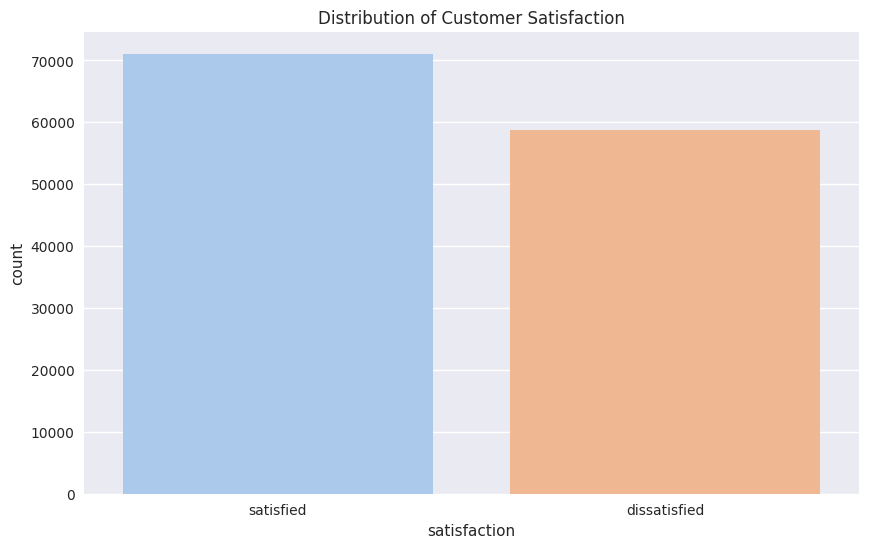

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction', data=df, palette=pastel_palette)
plt.title('Distribution of Customer Satisfaction')
plt.show()

/tmp/ipykernel_30/3903359180.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=df, x='Age', hue='satisfaction', kde=True, ax=axes[1, 0], palette=pastel_palette)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version 

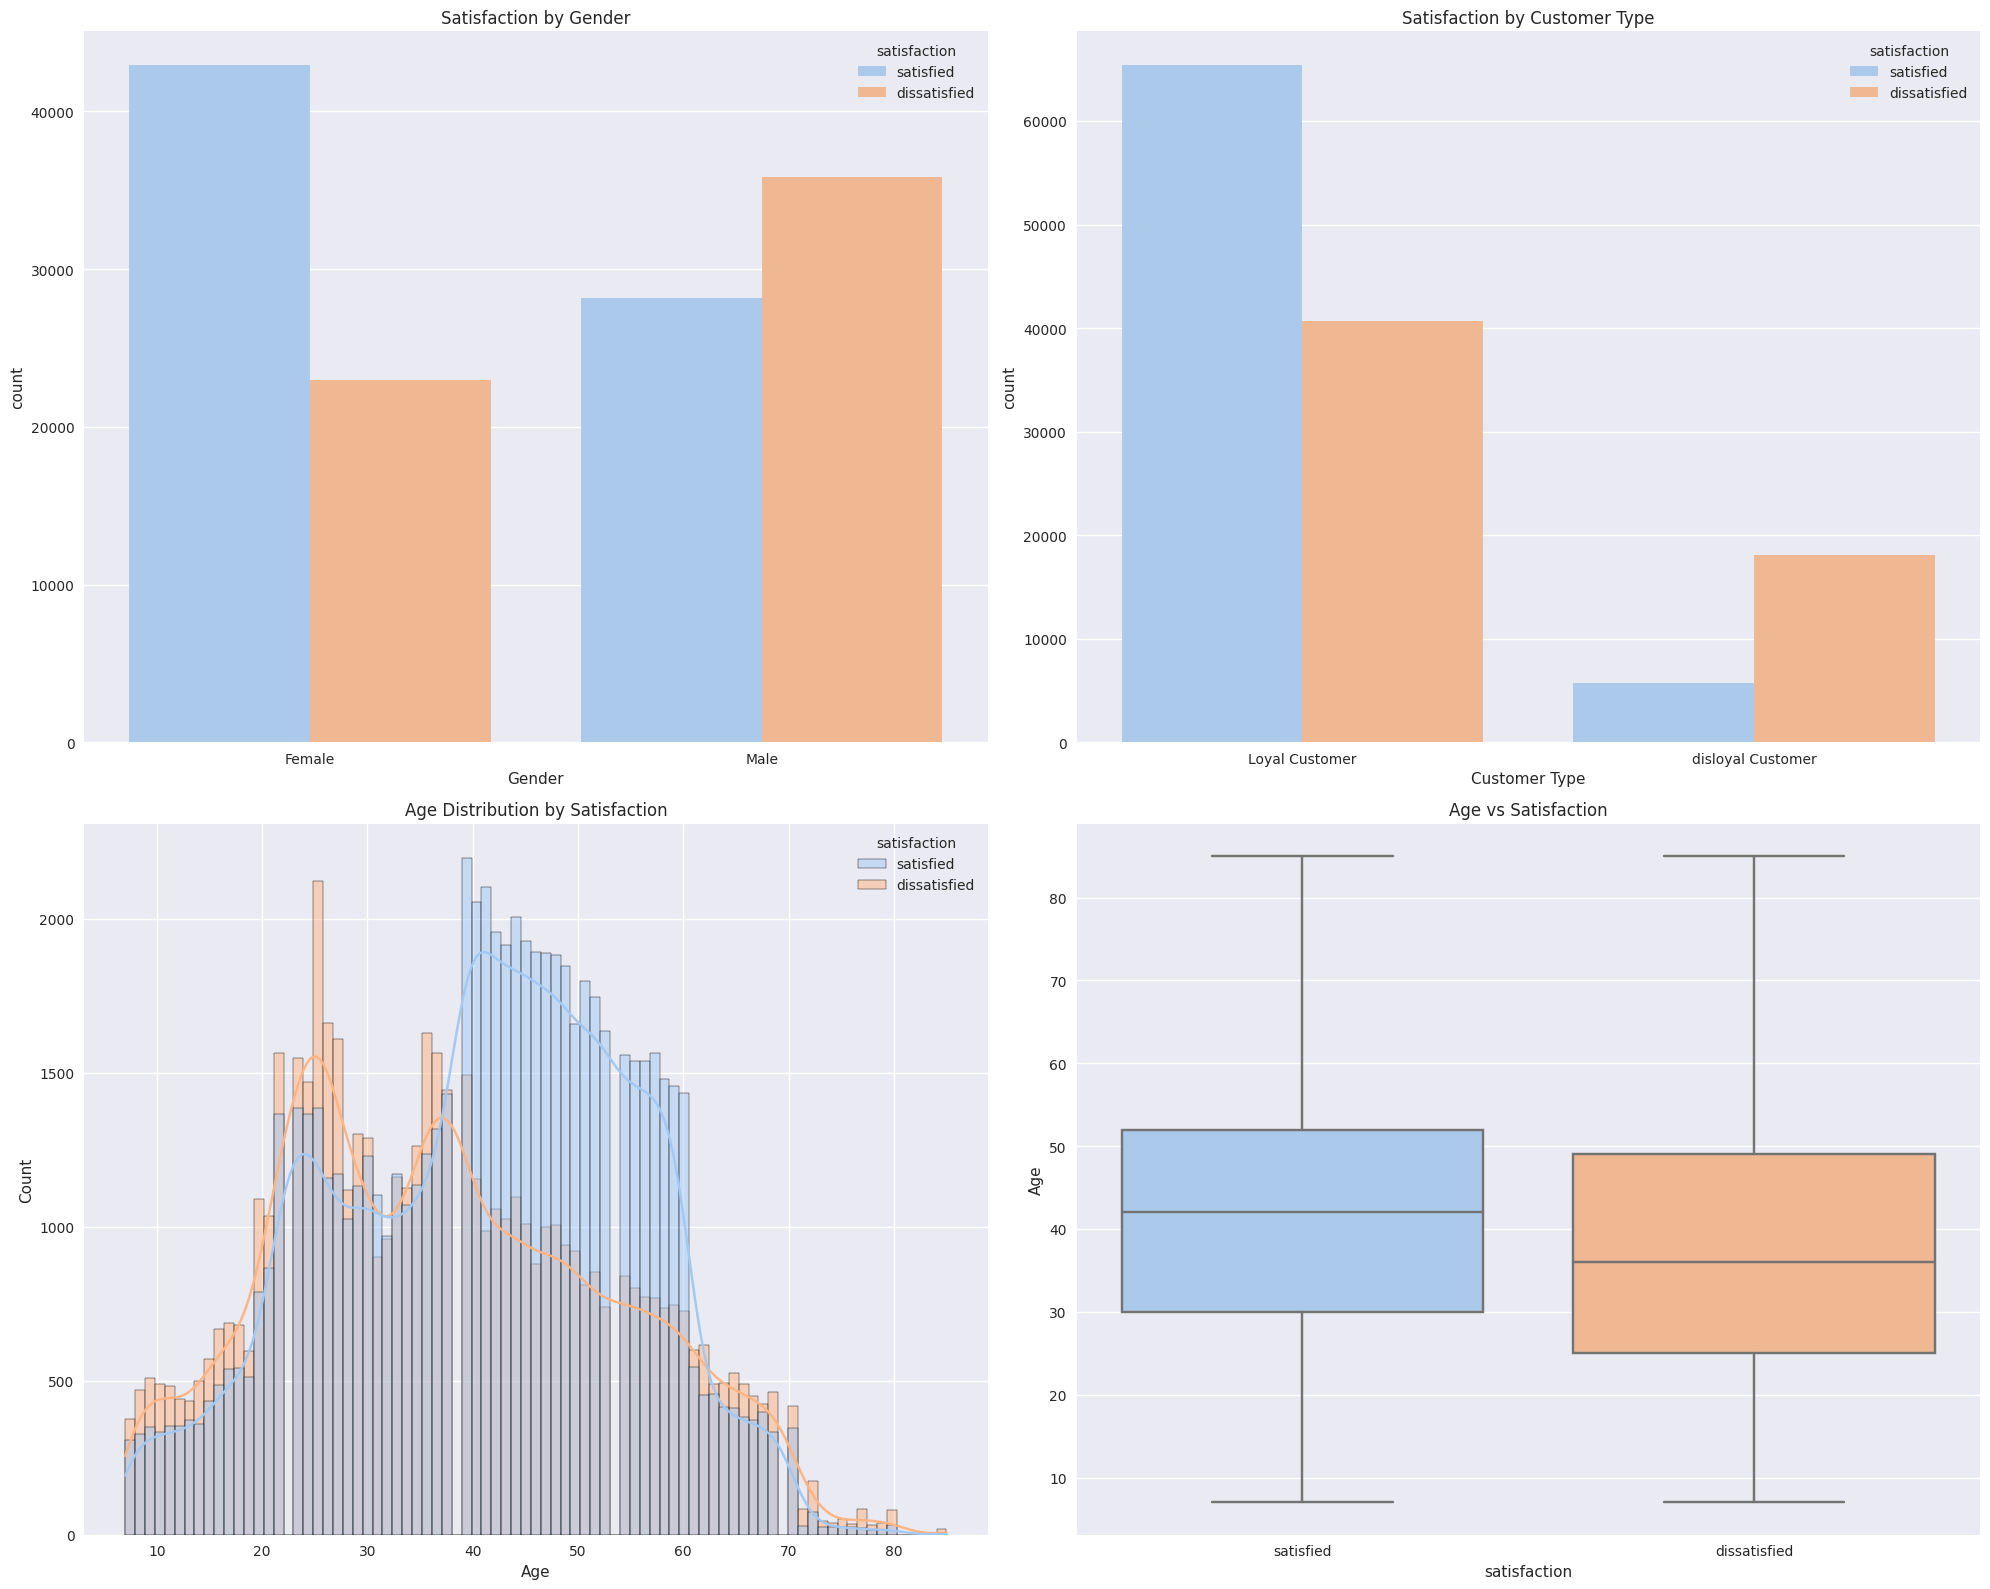

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

sns.countplot(x='Gender', hue='satisfaction', data=df, ax=axes[0, 0], palette=pastel_palette)
axes[0, 0].set_title('Satisfaction by Gender')

sns.countplot(x='Customer Type', hue='satisfaction', data=df, ax=axes[0, 1], palette=pastel_palette)
axes[0, 1].set_title('Satisfaction by Customer Type')

sns.histplot(data=df, x='Age', hue='satisfaction', kde=True, ax=axes[1, 0], palette=pastel_palette)
axes[1, 0].set_title('Age Distribution by Satisfaction')

sns.boxplot(x='satisfaction', y='Age', data=df, ax=axes[1, 1], palette=pastel_palette)
axes[1, 1].set_title('Age vs Satisfaction')

plt.tight_layout()
plt.show()

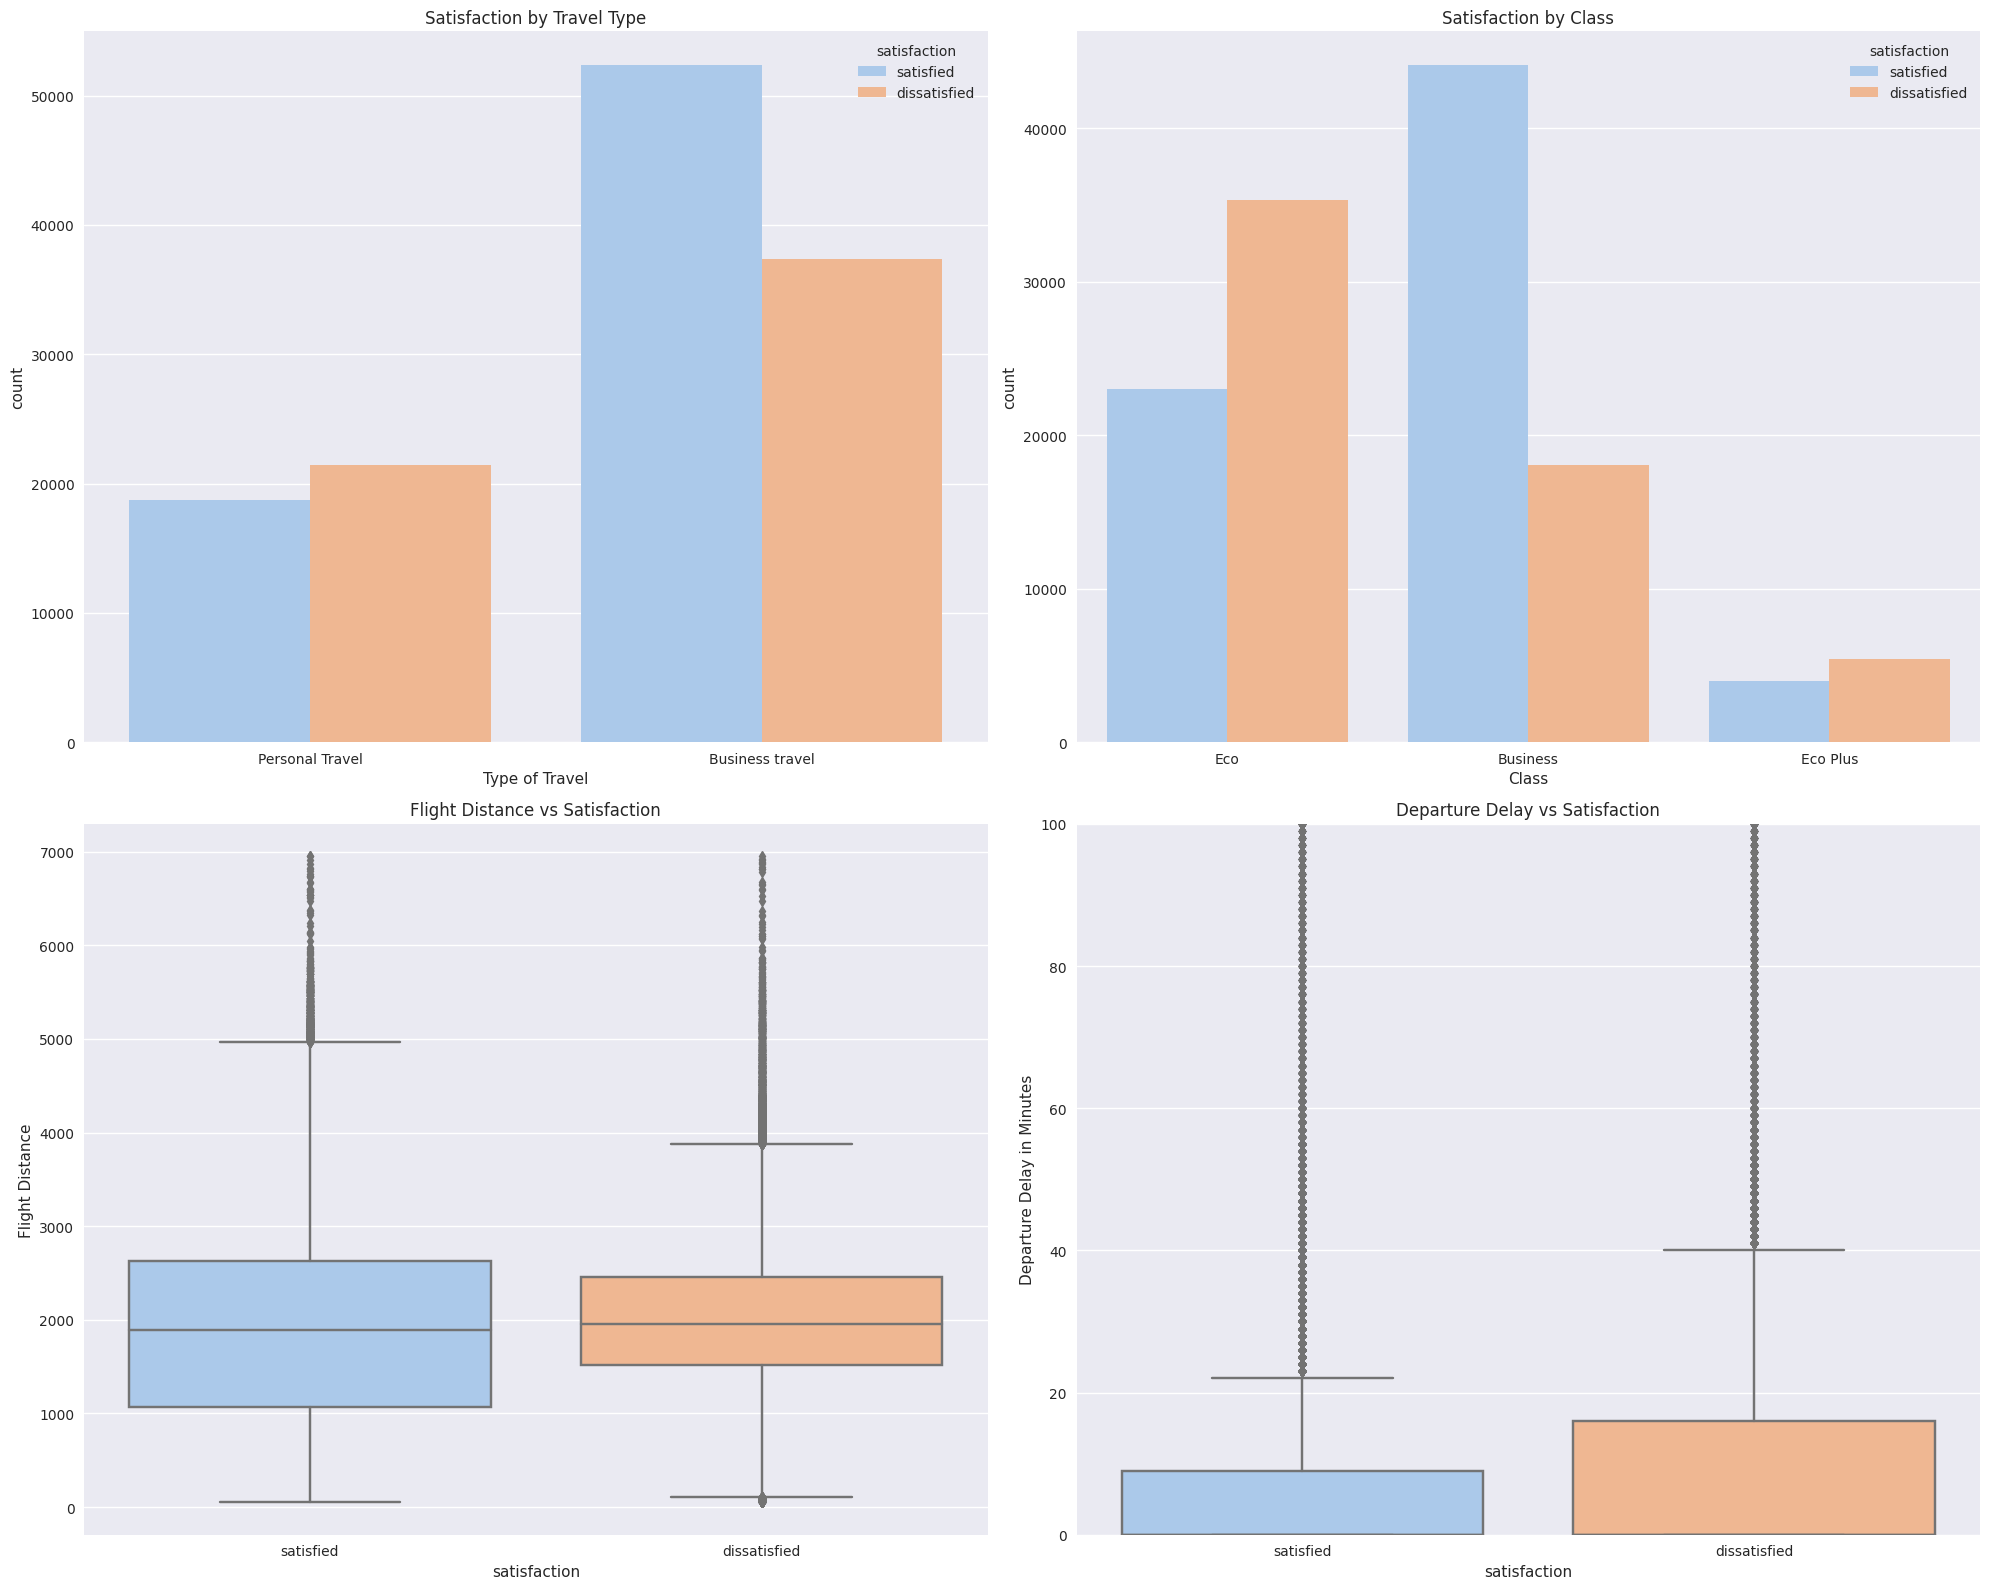

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

sns.countplot(x='Type of Travel', hue='satisfaction', data=df, ax=axes[0, 0], palette=pastel_palette)
axes[0, 0].set_title('Satisfaction by Travel Type')

sns.countplot(x='Class', hue='satisfaction', data=df, ax=axes[0, 1], palette=pastel_palette)
axes[0, 1].set_title('Satisfaction by Class')

sns.boxplot(x='satisfaction', y='Flight Distance', data=df, ax=axes[1, 0], palette=pastel_palette)
axes[1, 0].set_title('Flight Distance vs Satisfaction')

sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df, ax=axes[1, 1], palette=pastel_palette)
axes[1, 1].set_title('Departure Delay vs Satisfaction')
axes[1, 1].set_ylim(0, 100)  
plt.tight_layout()
plt.show()


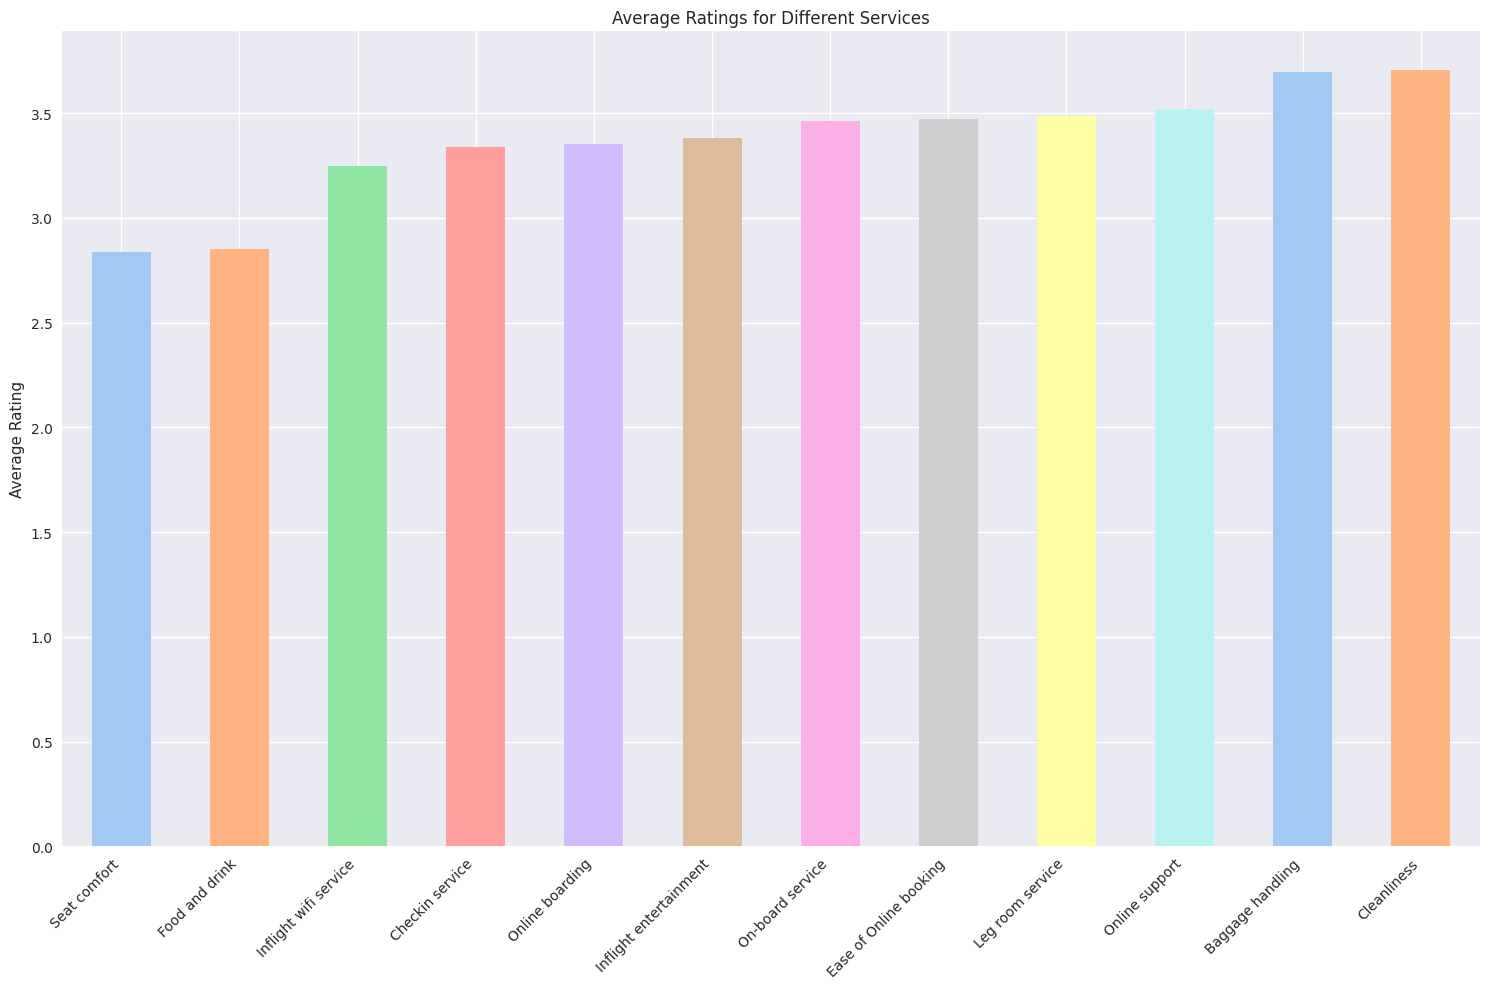

In [9]:
service_cols = ['Seat comfort', 'Food and drink', 'Inflight wifi service',
                'Inflight entertainment', 'On-board service', 'Leg room service',
                'Baggage handling', 'Checkin service', 'Cleanliness', 'Online support',
                'Ease of Online booking', 'Online boarding']

fig, ax = plt.subplots(figsize=(15, 10))
df[service_cols].mean().sort_values().plot(kind='bar', ax=ax, color=pastel_palette)
ax.set_title('Average Ratings for Different Services')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

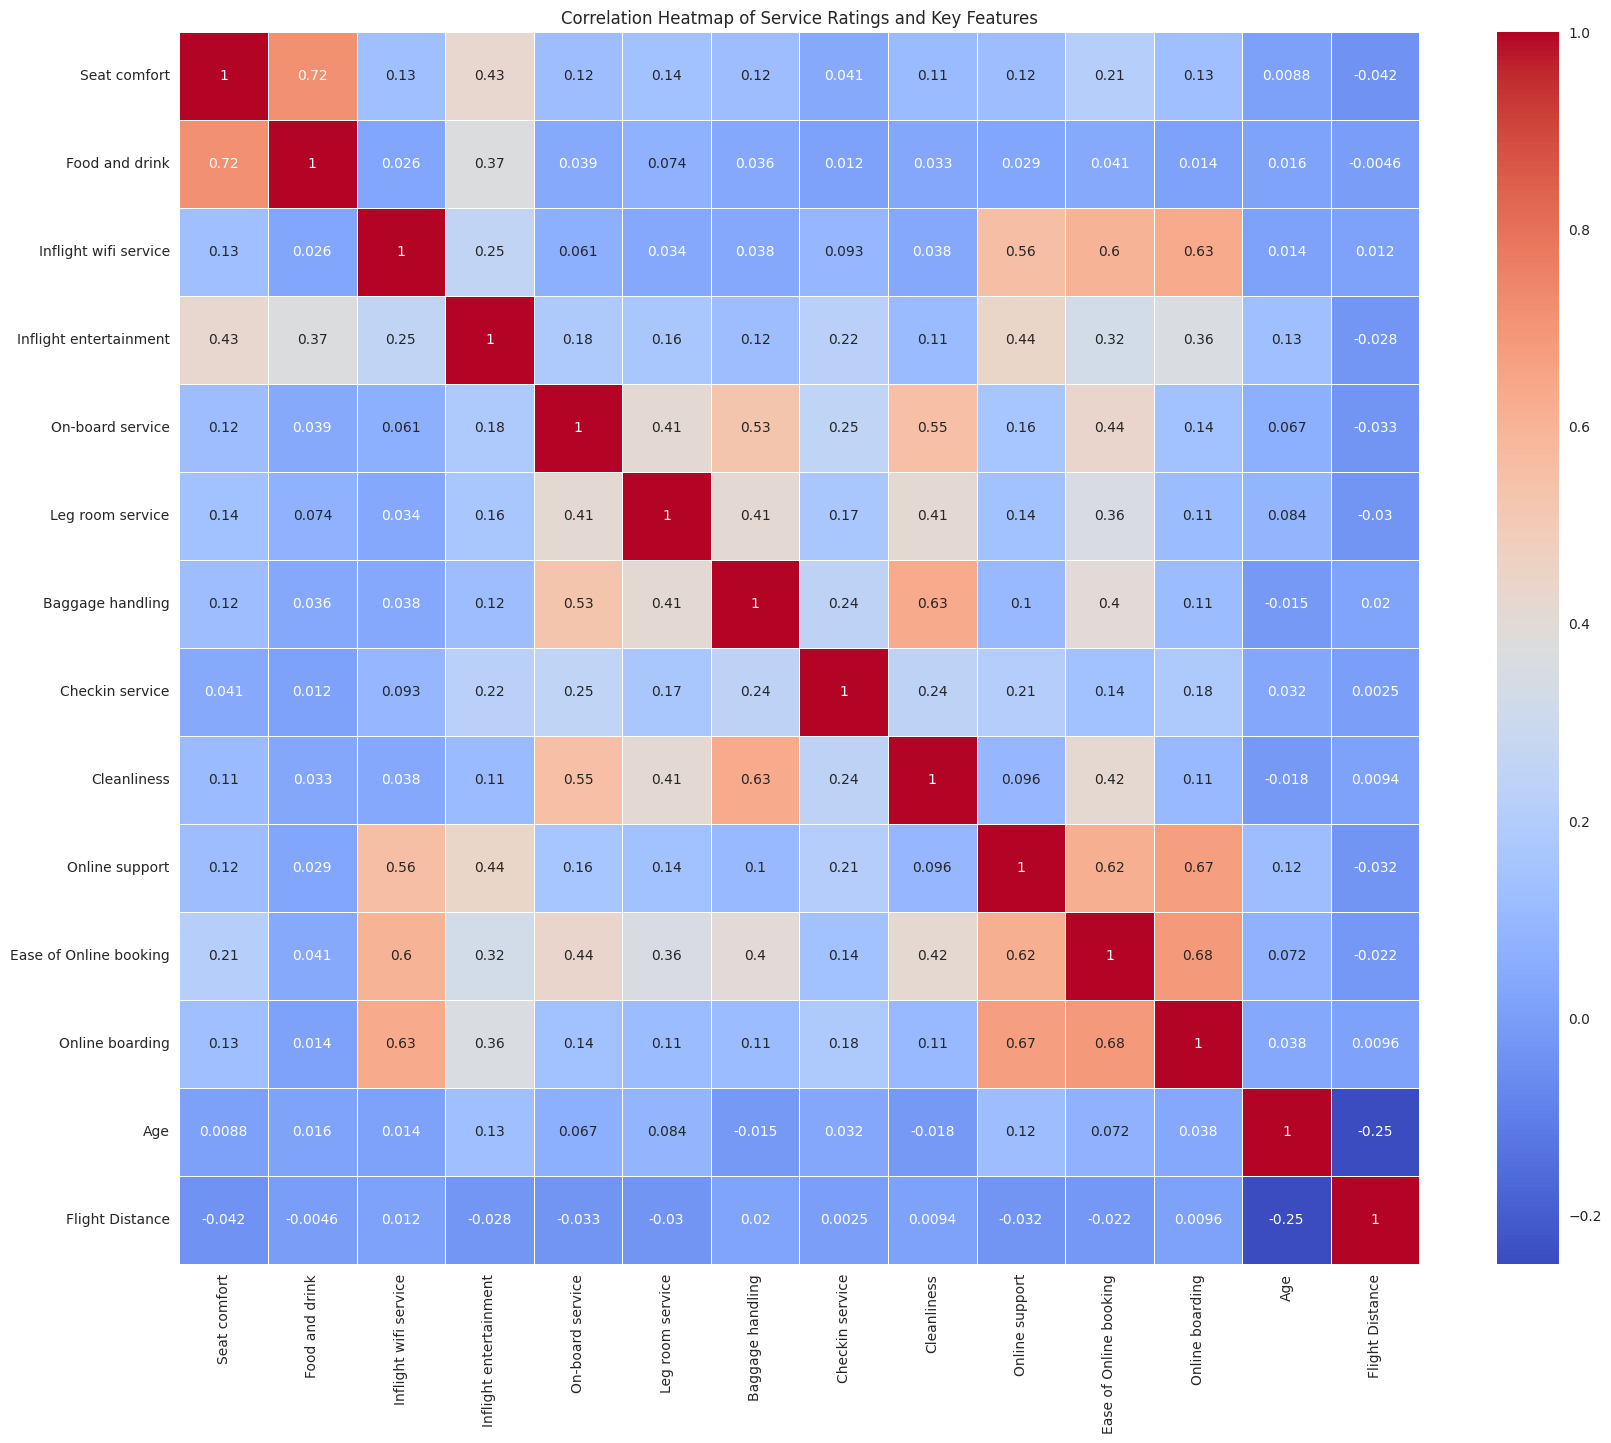

In [10]:
plt.figure(figsize=(20, 16))
sns.heatmap(df[service_cols + ['Age', 'Flight Distance']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Service Ratings and Key Features')
plt.show()

In [11]:
cat_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for var in cat_vars:
    chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df[var], df['satisfaction']))
    print(f"\nChi-square test for {var}:")
    print(f"Chi2 statistic: {chi2:.4f}")
    print(f"p-value: {p:.4f}")

num_vars = ['Age', 'Flight Distance', 'Departure Delay in Minutes'] + service_cols
for var in num_vars:
    t_stat, p_val = stats.ttest_ind(df[df['satisfaction'] == 'satisfied'][var],
                                    df[df['satisfaction'] == 'neutral or dissatisfied'][var])
    print(f"\nt-test for {var}:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")


Chi-square test for Gender:
Chi2 statistic: 5849.4764
p-value: 0.0000

Chi-square test for Customer Type:
Chi2 statistic: 11117.5360
p-value: 0.0000

Chi-square test for Type of Travel:
Chi2 statistic: 1549.3964
p-value: 0.0000

Chi-square test for Class:
Chi2 statistic: 12671.6838
p-value: 0.0000

t-test for Age:
t-statistic: nan
p-value: nan

t-test for Flight Distance:
t-statistic: nan
p-value: nan


/tmp/ipykernel_30/1110619452.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_ind(df[df['satisfaction'] == 'satisfied'][var],



t-test for Departure Delay in Minutes:
t-statistic: nan
p-value: nan

t-test for Seat comfort:
t-statistic: nan
p-value: nan

t-test for Food and drink:
t-statistic: nan
p-value: nan

t-test for Inflight wifi service:
t-statistic: nan
p-value: nan

t-test for Inflight entertainment:
t-statistic: nan
p-value: nan

t-test for On-board service:
t-statistic: nan
p-value: nan

t-test for Leg room service:
t-statistic: nan
p-value: nan

t-test for Baggage handling:
t-statistic: nan
p-value: nan

t-test for Checkin service:
t-statistic: nan
p-value: nan

t-test for Cleanliness:
t-statistic: nan
p-value: nan

t-test for Online support:
t-statistic: nan
p-value: nan

t-test for Ease of Online booking:
t-statistic: nan
p-value: nan

t-test for Online boarding:
t-statistic: nan
p-value: nan


/tmp/ipykernel_30/1846827455.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_rate = df.groupby('Distance_Bin')['satisfaction'].apply(lambda x: (x == 'satisfied').mean())


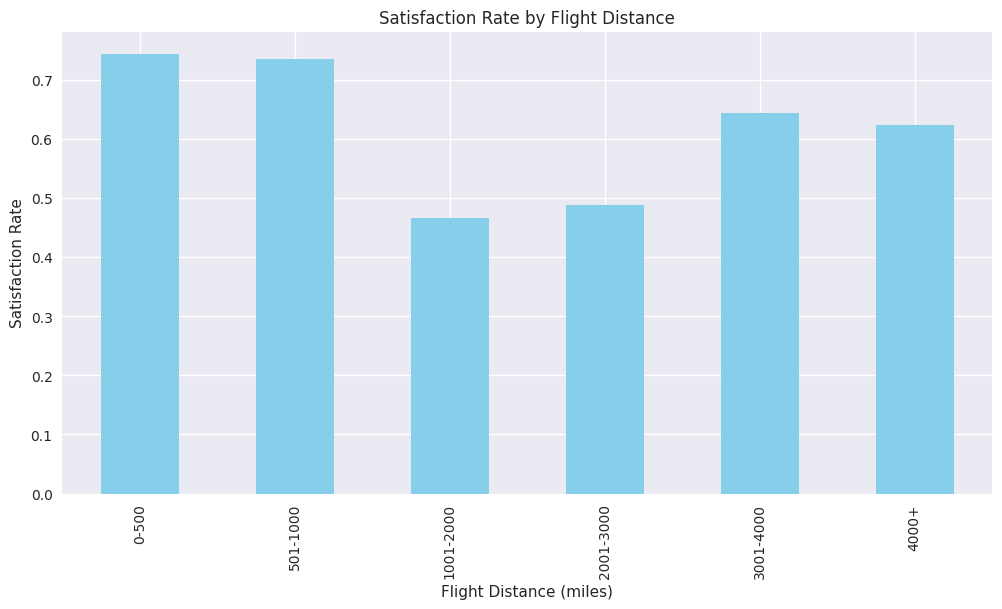

In [12]:
df['Distance_Bin'] = pd.cut(df['Flight Distance'], bins=[0, 500, 1000, 2000, 3000, 4000, np.inf],
                            labels=['0-500', '501-1000', '1001-2000', '2001-3000', '3001-4000', '4000+'])

satisfaction_rate = df.groupby('Distance_Bin')['satisfaction'].apply(lambda x: (x == 'satisfied').mean())

plt.figure(figsize=(12, 6))
satisfaction_rate.plot(kind='bar', color='skyblue')
plt.title('Satisfaction Rate by Flight Distance')
plt.ylabel('Satisfaction Rate')
plt.xlabel('Flight Distance (miles)')
plt.show()

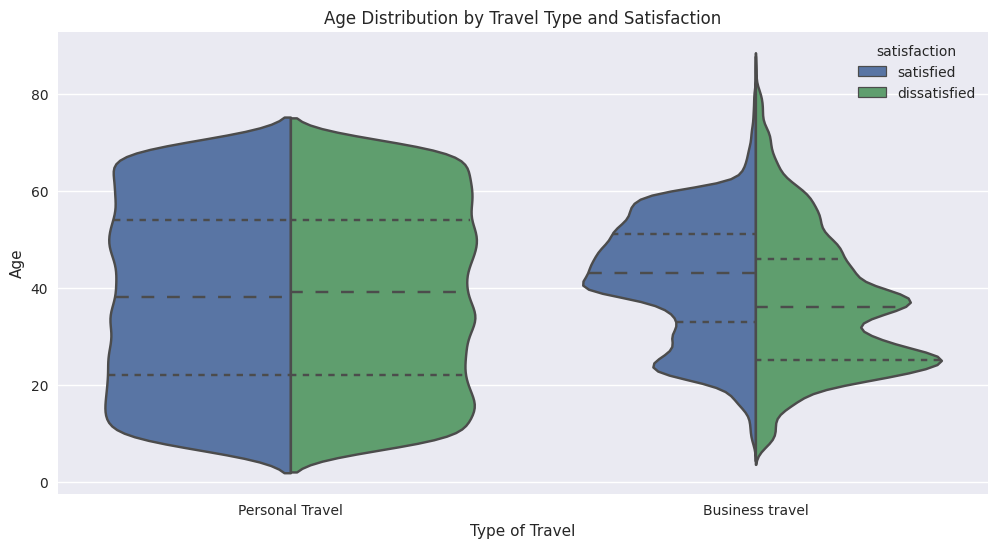

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Type of Travel', y='Age', hue='satisfaction', data=df, split=True, inner="quartile")
plt.title('Age Distribution by Travel Type and Satisfaction')
plt.show()

In [14]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_features

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [15]:
for cols in cat_features:
        cat_group = df.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        for i in range(0,(len(cat_group))):
            print('{} - {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))


100.0 - dissatisfied are dissatisfied
100.0 - satisfied are satisfied
65.14 - Female are satisfied
55.99 - Male are dissatisfied
61.63 - Loyal Customer are satisfied
76.03 - disloyal Customer are dissatisfied
58.37 - Business travel are satisfied
53.39 - Personal Travel are dissatisfied
70.94 - Business are satisfied
60.6 - Eco are dissatisfied
57.29 - Eco Plus are dissatisfied


/tmp/ipykernel_30/1821930714.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} - {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
/tmp/ipykernel_30/1821930714.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} - {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
/tmp/ipykernel_30/1821930714.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} - {

In [16]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_features

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Distance_Bin']

In [17]:
num_features = num_features[:-1]

In [18]:
num_features

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [19]:
for col in num_features:
    print(f'\n{col} grouped by satisfaction:')
    summary = df.groupby('satisfaction')[col].mean()  
    for satisfaction_level in summary.index:
        print(f'{satisfaction_level}: {round(summary[satisfaction_level], 2)}')



Age grouped by satisfaction:
dissatisfied: 37.47
satisfied: 41.05

Flight Distance grouped by satisfaction:
dissatisfied: 2025.71
satisfied: 1944.77

Seat comfort grouped by satisfaction:
dissatisfied: 2.47
satisfied: 3.15

Departure/Arrival time convenient grouped by satisfaction:
dissatisfied: 3.02
satisfied: 2.97

Food and drink grouped by satisfaction:
dissatisfied: 2.66
satisfied: 3.01

Gate location grouped by satisfaction:
dissatisfied: 3.01
satisfied: 2.98

Inflight wifi service grouped by satisfaction:
dissatisfied: 2.92
satisfied: 3.52

Inflight entertainment grouped by satisfaction:
dissatisfied: 2.61
satisfied: 4.02

Online support grouped by satisfaction:
dissatisfied: 2.96
satisfied: 3.98

Ease of Online booking grouped by satisfaction:
dissatisfied: 2.85
satisfied: 3.98

On-board service grouped by satisfaction:
dissatisfied: 2.97
satisfied: 3.87

Leg room service grouped by satisfaction:
dissatisfied: 3.05
satisfied: 3.84

Baggage handling grouped by satisfaction:
diss

# Preprocessing

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import joblib

In [21]:
df

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Ease of Online booking  On-board service  Leg room service  \
0                            3                 3                 0   
1                            3                 4                 4   
2                            2                 3                 3   
3                            1                 1                 0   
4                            2                 2                 0   
...                        ...               ...               ...   
129875                       2                 3                 3   
129876                       3                 2                 3   
129877                       4                 4                 3   
129878                       3                 3                 2   
129879                       4                 5                 5   

        Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                      3                5            3                2   
1                      4                2            3                2   
2                      4                4            4                2   
3                      1                4            1                3   
4                      2                4            2                5   
...                  ...              ...          ...              ...   
129875                 4                4            4                2   
129876                 3                1            2                1   
129877                 4                2            3                2   
129878                 3                2            1                2   
129879                 5                3            3     

In [22]:
df = df.drop(columns=['Distance_Bin'])

In [23]:
df

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3                 3                1            2   
129877                 3                 4                2            3   
129878                 2                 3                2            1   
129879                 5                 5                3            3

In [24]:
print("Missing values before removal:\n", df.isnull().sum())

Missing values before removal:
 satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [25]:
df = df.dropna()

In [26]:
print("Missing values after removal:\n", df.isnull().sum())

Missing values after removal:
 satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

/tmp/ipykernel_30/931297178.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipykernel_30/931297178.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipykernel_30/931297178.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [28]:
y = df["satisfaction"]
X = df.drop("satisfaction", axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGB

In [39]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [40]:
y_pred_xg = xgb_model.predict(X_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_xg)
print(f'Accuracy: {accuracy:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred_xg))

y_pred_proba_xg = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_xg)
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9602

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

ROC AUC Score: 0.5903


# Random Forest

In [42]:
rf_model = RandomForestClassifier(random_state=42)

In [43]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [45]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f'Random Forest ROC AUC Score: {roc_auc_rf:.4f}')

Random Forest Accuracy: 0.9586

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

Random Forest ROC AUC Score: 0.9936


# Deep neural nets

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
NN_model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  
    layers.Dense(64, activation='relu'),             
    layers.Dense(32, activation='relu'),              
    layers.Dense(1, activation='sigmoid')             
])

NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [48]:
history = NN_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8805 - loss: 0.2819 - val_accuracy: 0.9315 - val_loss: 0.1658
Epoch 2/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9319 - loss: 0.1626 - val_accuracy: 0.9392 - val_loss: 0.1420
Epoch 3/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9423 - loss: 0.1361 - val_accuracy: 0.9471 - val_loss: 0.1295
Epoch 4/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9465 - loss: 0.1261 - val_accuracy: 0.9432 - val_loss: 0.1331
Epoch 5/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9496 - loss: 0.1177 - val_accuracy: 0.9495 - val_loss: 0.1222
Epoch 6/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9514 - loss: 0.1140 - val_accuracy: 0.9484 - val_loss: 0.1176
Epoch 7/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9517 - loss: 0.1122 - val_accuracy: 0.9499 - val_loss: 0.1192
Epoch 8/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9536 - loss: 0.1073 - 

In [49]:
y_pred_prob_NN = NN_model.predict(X_test_scaled).flatten()  
y_pred = (y_pred_prob_NN > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred)
print(f'Deep Neural Network Accuracy: {accuracy:.4f}')

print("\nDeep Neural Network Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob_NN)
print(f'Deep Neural Network ROC AUC Score: {roc_auc:.4f}')

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Deep Neural Network Accuracy: 0.9542

Deep Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11821
           1       0.97      0.94      0.96     14077

    accuracy                           0.95     25898
   macro avg       0.95      0.96      0.95     25898
weighted avg       0.95      0.95      0.95     25898

Deep Neural Network ROC AUC Score: 0.9933


# Quantum inspired NN

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import register_keras_serializable

In [12]:
@register_keras_serializable()
class QuantumLayer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(QuantumLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="glorot_uniform",
            trainable=True,
            name="kernel"
        )

    def call(self, inputs):
        weighted_sum = tf.matmul(inputs, self.kernel)
        return tf.nn.softplus(weighted_sum)

    def get_config(self):
        config = super(QuantumLayer, self).get_config()
        config.update({"units": self.units})
        return config

@register_keras_serializable()
class QuantumInspiredNN(Model):
    def __init__(self, input_shape, **kwargs):
        super(QuantumInspiredNN, self).__init__(**kwargs)
        self.input_shape = input_shape
        self.dense1 = Dense(64, activation='relu')
        self.dense2 = QuantumLayer(32)
        self.dense3 = Dense(16, activation='relu')
        self.output_layer = Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        output = self.output_layer(x)
        return output

    def get_config(self):
        config = super(QuantumInspiredNN, self).get_config()
        config.update({"input_shape": self.input_shape})
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [35]:
input_shape = X_train_scaled.shape[1]  
QINN_model = QuantumInspiredNN(input_shape)
QINN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
QINN_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8785 - loss: 0.2855 - val_accuracy: 0.9287 - val_loss: 0.1739
Epoch 2/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9292 - loss: 0.1669 - val_accuracy: 0.9383 - val_loss: 0.1492
Epoch 3/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9374 - loss: 0.1465 - val_accuracy: 0.9426 - val_loss: 0.1381
Epoch 4/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9420 - loss: 0.1336 - val_accuracy: 0.9427 - val_loss: 0.1297
Epoch 5/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9458 - loss: 0.1257 - val_accuracy: 0.9478 - val_loss: 0.1223
Epoch 6/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9477 - loss: 0.1207 - val_accuracy: 0.9457 - val_loss: 0.1274
Epoch 7/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9515 - loss: 0.1115 - val_accuracy: 0.9483 - val_loss: 0.1161
Epoch 8/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9507 - loss: 0.1132 - 

In [54]:
y_pred = QINN_model.predict(X_test_scaled).flatten()
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Quantum-Inspired Neural Network Accuracy: {accuracy:.4f}")
print("Quantum-Inspired Neural Network Classification Report:")
print(classification_rep)
print(f"Quantum-Inspired Neural Network ROC AUC Score: {roc_auc:.4f}")

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Quantum-Inspired Neural Network Accuracy: 0.9552
Quantum-Inspired Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11821
           1       0.97      0.95      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.95      0.96      0.95     25898
weighted avg       0.96      0.96      0.96     25898

Quantum-Inspired Neural Network ROC AUC Score: 0.9931


# Stacking Ensemble

In [13]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier
from tensorflow.keras.models import clone_model
from tensorflow.keras.utils import serialize_keras_object, deserialize_keras_object


In [14]:
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):

    def __init__(self, model, epochs=20, batch_size=32):
        self.model = model
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        self.model_ = clone_model(self.model)
        self.model_.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)

        self.classes_ = np.unique(y)

        return self

    def predict(self, X):
        return (self.model_.predict(X) > 0.5).astype(int)

    def predict_proba(self, X):
        preds = self.model_.predict(X)
        return np.column_stack((1 - preds, preds))

    def __getstate__(self):
        state = self.__dict__.copy()
        state['model'] = serialize_keras_object(self.model)6
        if 'model_' in state:
            state['model_'] = serialize_keras_object(state['model_'])
        return state

    def __setstate__(self, state):
        self.__dict__.update(state)
        self.model = deserialize_keras_object(state['model'])
        if 'model_' in state:
            self.model_ = deserialize_keras_object(state['model_'])

In [57]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
    ('dnn', KerasClassifierWrapper(NN_model, epochs=20, batch_size=32)),
    ('qinn', KerasClassifierWrapper(QINN_model, epochs=50, batch_size=32))
]

meta_learner = LogisticRegression()

In [58]:
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5 
)

stacking_clf.fit(X_train_scaled, y_train)

648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importa...
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('dnn',
                                KerasClassifierWrapper(model=<Sequential name=sequential, built=True>)),
                               ('qinn',
                                KerasClassifierWrapper(epochs=50,
                                                       model=<QuantumInspiredNN name=quantum_inspired_nn, built=True>))],
                   final_estimator=LogisticRegression())

In [59]:
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
NN_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)
QINN_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

individual_models = [
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('Deep Neural Network', NN_model),
    ('Quantum-Inspired NN', QINN_model)
]

for name, model in individual_models:
    if isinstance(model, (RandomForestClassifier, XGBClassifier)):
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else: 
        y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
        y_pred_proba = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Random Forest Results:
Accuracy: 0.9586
ROC AUC Score: 0.9936
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898


XGBoost Results:
Accuracy: 0.9602
ROC AUC Score: 0.9947
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Deep Neural Network Results:
Accuracy: 0.9558
ROC AUC Score: 0.9938
Classification Report:
      

In [60]:
y_pred_stack = stacking_clf.predict(X_test_scaled)
y_pred_proba_stack = stacking_clf.predict_proba(X_test_scaled)[:, 1]

accuracy_stack = accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_pred_proba_stack)

print("\nStacking Classifier Results:")
print(f"Accuracy: {accuracy_stack:.4f}")
print(f"ROC AUC Score: {roc_auc_stack:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_stack))     

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Stacking Classifier Results:
Accuracy: 0.9623
ROC AUC Score: 0.9950
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11821
           1       0.97      0.96      0.97     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



In [61]:
X.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

# Model-agnostic

## Local Explainability LIME

In [35]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [40]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

In [41]:
explainer = LimeTabularExplainer(
    X_train_scaled, 
    feature_names=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'], 
    class_names=['Not Satisfied', 'Satisfied'], 
    mode='classification'
)

### Lime on XGB

In [42]:
i = 0  
exp_xgb = explainer.explain_instance(
    X_test_scaled[i],  
    xgb_model.predict_proba,  
    num_features=22 
)

In [43]:
exp_xgb.show_in_notebook()  
print(exp_xgb.as_list())

[('Customer Type <= -0.47', 0.2701614730063837), ('Type of Travel <= -0.67', 0.19509182424695995), ('Inflight entertainment > 0.46', 0.1604755179745395), ('Checkin service > 0.52', 0.12689952839477125), ('-0.98 < Gender <= 1.02', -0.07287166494453887), ('-0.60 < Baggage handling <= 0.26', -0.05414089887245962), ('-0.61 < Cleanliness <= 0.26', -0.0463552807739481), ('-1.04 < Online boarding <= 0.50', -0.042004338789792796), ('-1.13 < Ease of Online booking <= 0.40', 0.030197599046740242), ('Flight Distance > 0.55', -0.028213956661369), ('-0.39 < Arrival Delay in Minutes <= -0.05', 0.02375342417808021), ('-0.82 < Age <= 0.04', 0.02145302774151236), ('-0.40 < Online support <= 0.37', -0.019846859994228548), ('Class <= -0.95', -0.019367413704365132), ('0.01 < Gate location <= 0.77', -0.017123380769877284), ('-0.19 < Inflight wifi service <= 0.57', 0.016906521955123033), ('-0.37 < On-board service <= 0.42', 0.015401108341287667), ('-1.15 < Leg room service <= 0.40', -0.01481566558872339), (

### Lime on RF

In [44]:
exp_rf = explainer.explain_instance(
    X_test_scaled[i], 
    rf_model.predict_proba, 
    num_features=22
)
exp_rf.show_in_notebook()

### Lime on DNN

In [45]:
def predict_proba(x):
    proba = NN_model.predict(x).astype(float)
    return np.hstack([1 - proba, proba]) 

In [46]:
from scipy.special import softmax

def predict_proba(x):
    raw_preds = NN_model.predict(x).astype(float).flatten()
    prob_preds = np.vstack([1 - raw_preds, raw_preds]).T  
    return prob_preds


In [47]:
instance = X_test_scaled[i]

In [48]:
exp_dnn = explainer.explain_instance(
    data_row=instance,
    predict_fn=predict_proba,
    num_features=22 
)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
exp_dnn.show_in_notebook(show_table=True, show_all=False)

### Lime on QINN

In [50]:
def predict_fn(instance):
    preds = QINN_model.predict(instance)

    if preds.shape[1] == 1:  
        return np.hstack([1 - preds, preds]) 
    return preds  

In [51]:
exp = explainer.explain_instance(
    instance.flatten(), 
    predict_fn,          
    num_features=10     
)

exp.show_in_notebook(show_table=True, show_all=False)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Lime on Ensemble

In [52]:
def predict_fn_stacking(instance):
    preds = stacking_model.predict_proba(instance)
    return preds  

In [53]:
instance_to_explain = X_test_scaled[0].reshape(1, -1)  

exp_stacking = explainer.explain_instance(
    instance_to_explain.flatten(),  
    predict_fn_stacking,             
    num_features=10                  
)

exp_stacking.show_in_notebook(show_table=True, show_all=False)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# Global Explainability Method: Permutation Importance

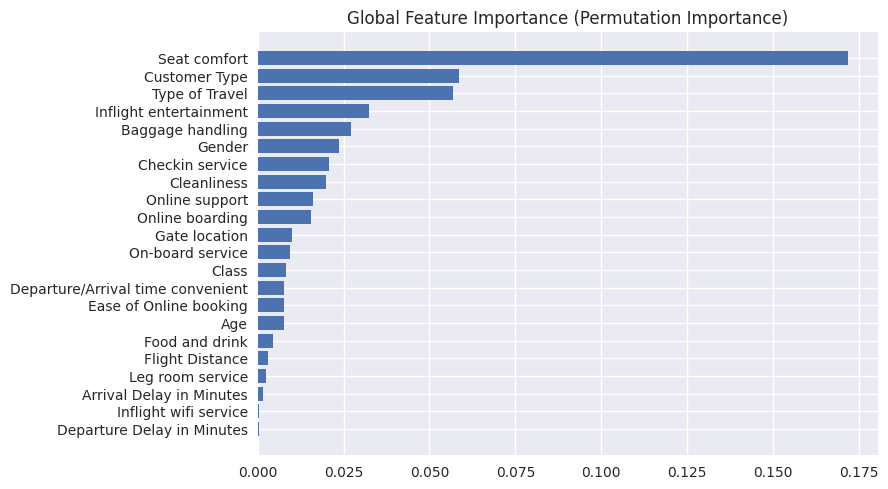

In [91]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    xgb_model,  
    X_test_scaled,  
    y_test,  
    n_repeats=10,  
    random_state=42
)

importances = result.importances_mean 
feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

sorted_idx = importances.argsort()

import matplotlib.pyplot as plt

plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.title("Global Feature Importance (Permutation Importance)")
plt.show()

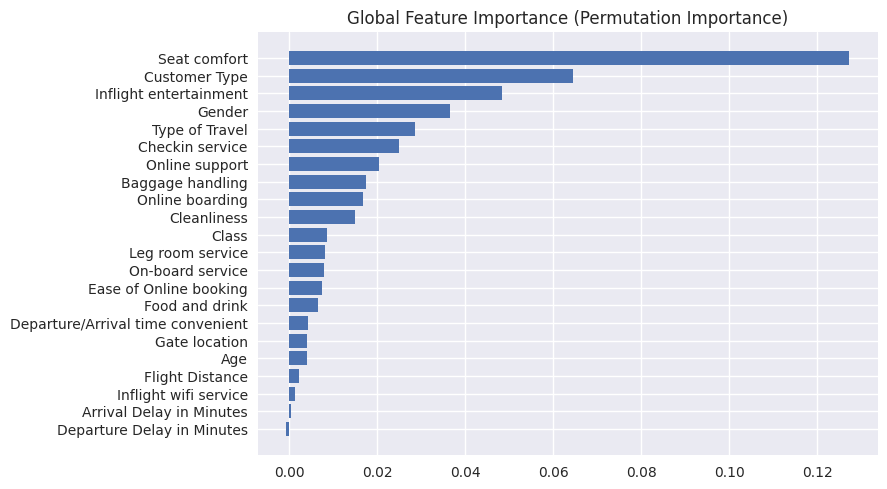

In [93]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_model, 
    X_test_scaled, 
    y_test, 
    n_repeats=10,  
    random_state=42
)

importances = result.importances_mean  
sorted_idx = importances.argsort()

import matplotlib.pyplot as plt

plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.title("Global Feature Importance (Permutation Importance)")
plt.show()

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━

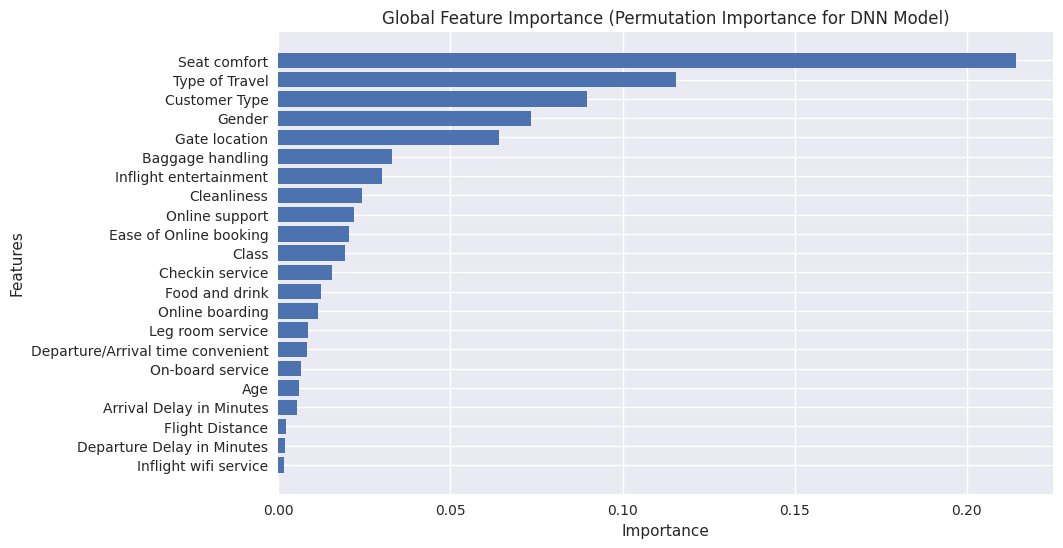

In [98]:
def nn_scorer(model, X, y):
    y_pred = model.predict(X)
    y_pred_classes = (y_pred > 0.5).astype(int)  
    return accuracy_score(y, y_pred_classes)

result = permutation_importance(
    NN_model,
    X_test_scaled,
    y_test,
    scoring=nn_scorer,
    n_repeats=10,
    random_state=42
)

importances = result.importances_mean
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])  
plt.title("Global Feature Importance (Permutation Importance for DNN Model)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━

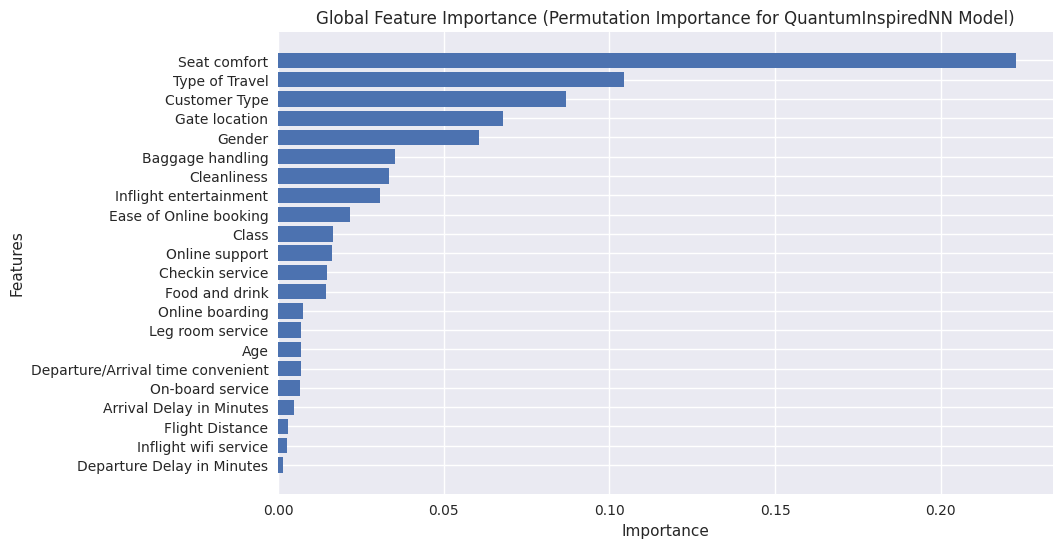

In [99]:
def qinn_scorer(model, X, y):
    y_pred = model.predict(X)
    y_pred_classes = (y_pred > 0.5).astype(int) 
    return accuracy_score(y, y_pred_classes)

result = permutation_importance(
    QINN_model,
    X_test_scaled,
    y_test,
    scoring=qinn_scorer,
    n_repeats=10,
    random_state=42
)

importances = result.importances_mean
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx]) 
plt.title("Global Feature Importance (Permutation Importance for QuantumInspiredNN Model)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━

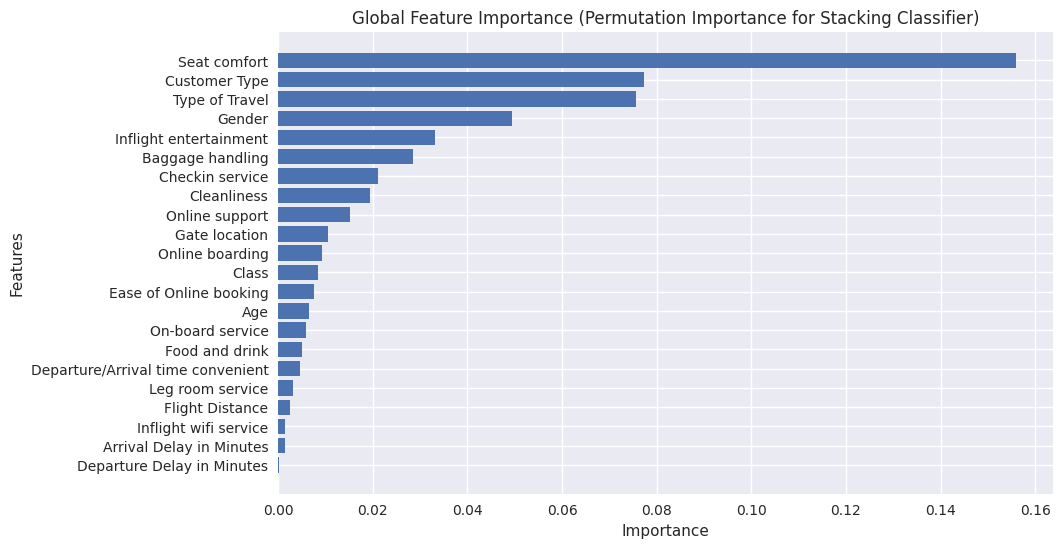

In [102]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

def stacking_scorer(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)

stacking_result = permutation_importance(
    stacking_model,
    X_test_scaled,
    y_test,
    scoring=stacking_scorer,  
    n_repeats=10,
    random_state=42
)

stacking_importances = stacking_result.importances_mean
sorted_stacking_idx = stacking_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(stacking_importances)), stacking_importances[sorted_stacking_idx], align='center')
plt.yticks(range(len(stacking_importances)), [feature_names[i] for i in sorted_stacking_idx])
plt.title("Global Feature Importance (Permutation Importance for Stacking Classifier)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Partial Dependence Plots (PDP)

In [54]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

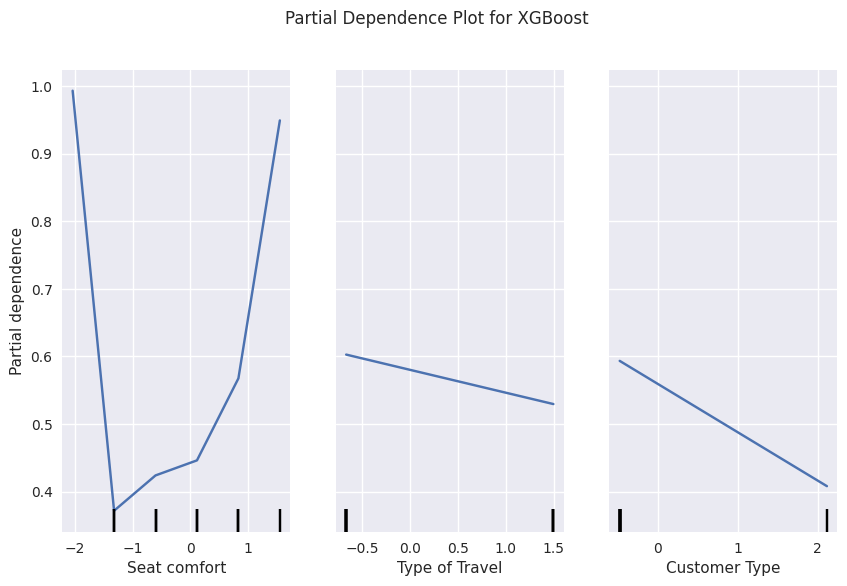

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    xgb_model, X_test_scaled, features = [6, 3, 1], 
    feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], ax=ax
)
plt.suptitle('Partial Dependence Plot for XGBoost')
plt.show()

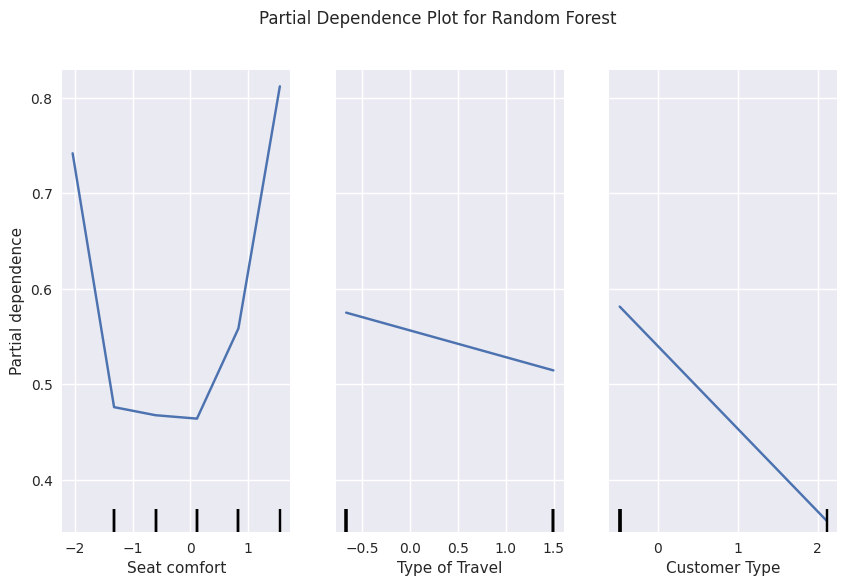

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    rf_model, X_test_scaled, features = [6, 3, 1], 
    feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], ax=ax
)
plt.suptitle('Partial Dependence Plot for Random Forest')
plt.show()

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


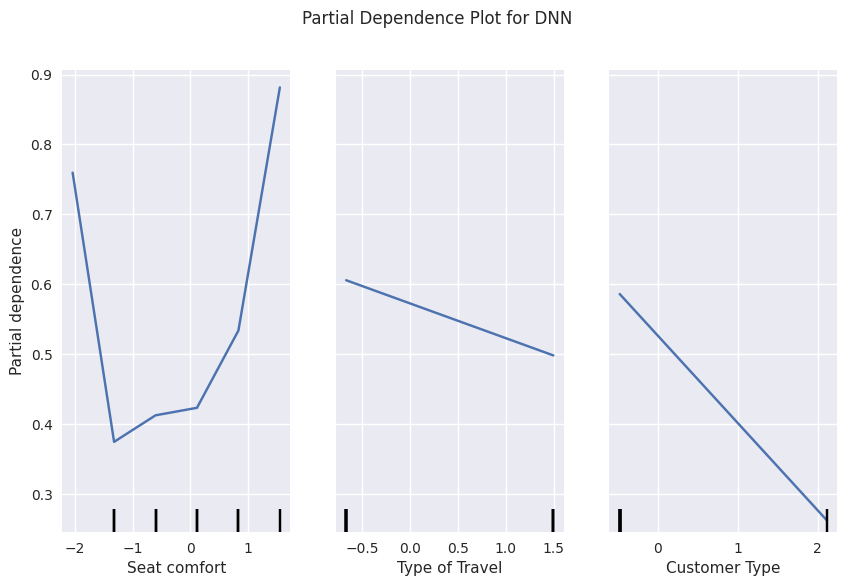

In [57]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from tensorflow.keras.models import clone_model

class KerasPDPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=20, batch_size=32):
        self.model = model
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        self.model_ = clone_model(self.model)
        self.model_.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)

        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return (self.model_.predict(X) > 0.5).astype(int)

    def predict_proba(self, X):
        preds = self.model_.predict(X)
        return np.column_stack((1 - preds, preds))

dnn_wrapper = KerasPDPWrapper(NN_model)
dnn_wrapper.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    dnn_wrapper, X_test_scaled, features = [6, 3, 1],
    feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], ax=ax
)
plt.suptitle('Partial Dependence Plot for DNN')
plt.show()

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


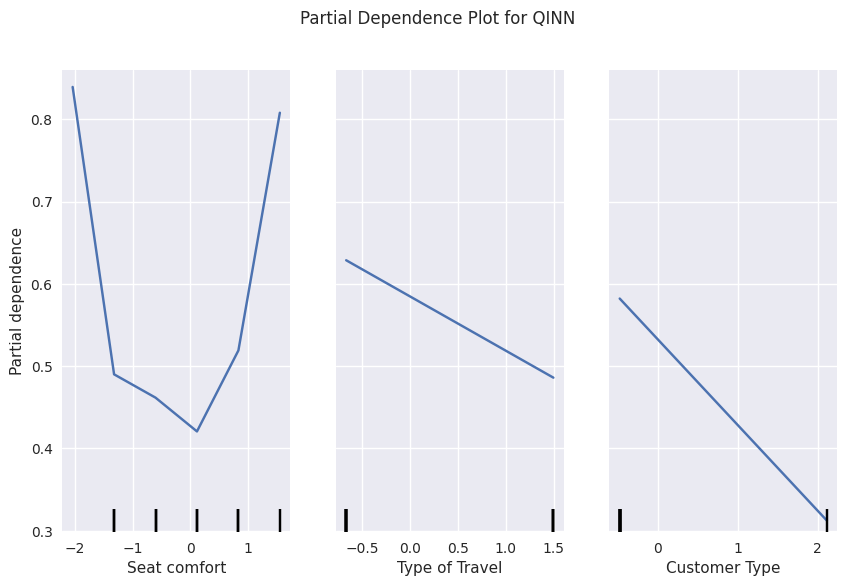

In [58]:
class QINNPDPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=50, batch_size=32):
        self.model = model
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        self.model_ = clone_model(self.model)
        self.model_.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)

        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return (self.model_.predict(X) > 0.5).astype(int)

    def predict_proba(self, X):
        preds = self.model_.predict(X)
        return np.column_stack((1 - preds, preds))

qinn_wrapper = QINNPDPWrapper(QINN_model)
qinn_wrapper.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    qinn_wrapper, X_test_scaled, features = [6, 3, 1],  
    feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], ax=ax
)
plt.suptitle('Partial Dependence Plot for QINN')
plt.show()

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


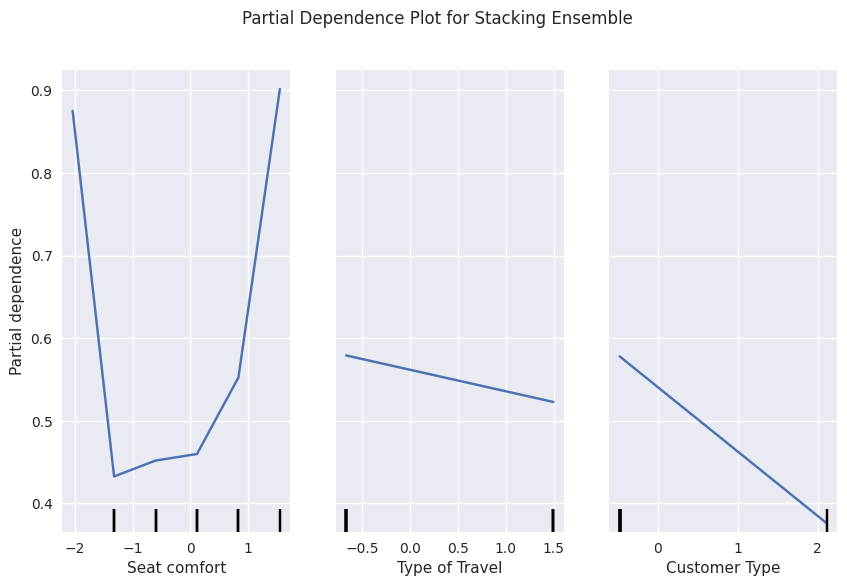

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    stacking_model, X_test_scaled, features = [6, 3, 1],  
    feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], ax=ax
)
plt.suptitle('Partial Dependence Plot for Stacking Ensemble')
plt.show()

# Accumulated Local Effects (ALE)


In [60]:
pip install alibi

Note: you may need to restart the kernel to use updated packages.


In [61]:
from alibi.explainers.ale import ALE
import matplotlib.pyplot as plt

In [62]:
def plot_ale(model, X_train_scaled, feature_names, features_idx, model_name):
    ale = ALE(model.predict, feature_names=feature_names)
    explanation = ale.explain(X_train_scaled)

    fig, axes = plt.subplots(nrows=1, ncols=len(features_idx), figsize=(15, 5))
    for i, feature_idx in enumerate(features_idx):
        axes[i].plot(explanation.ale_values[feature_idx])
        axes[i].set_title(f'ALE of {feature_names[feature_idx]} ({model_name})')
        axes[i].set_xlabel(f'{feature_names[feature_idx]}')
        axes[i].set_ylabel('ALE')

    plt.tight_layout()
    plt.show()

In [63]:
features_idx = [6, 3, 1]  
feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

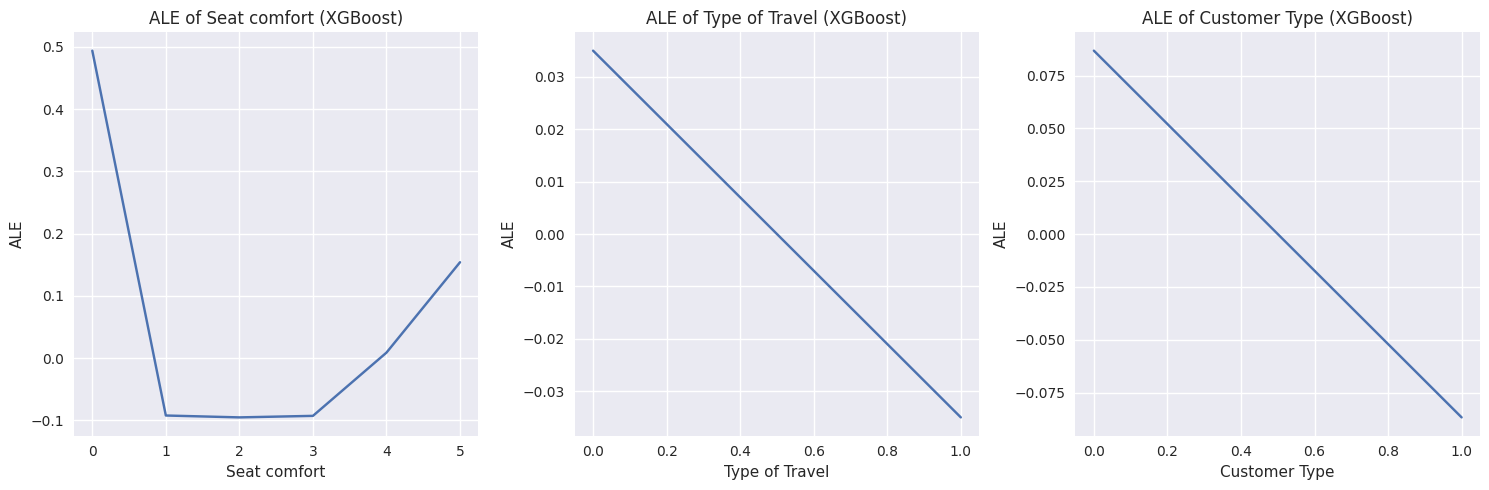

In [64]:
plot_ale(xgb_model, X_train_scaled, feature_names, features_idx, model_name='XGBoost')

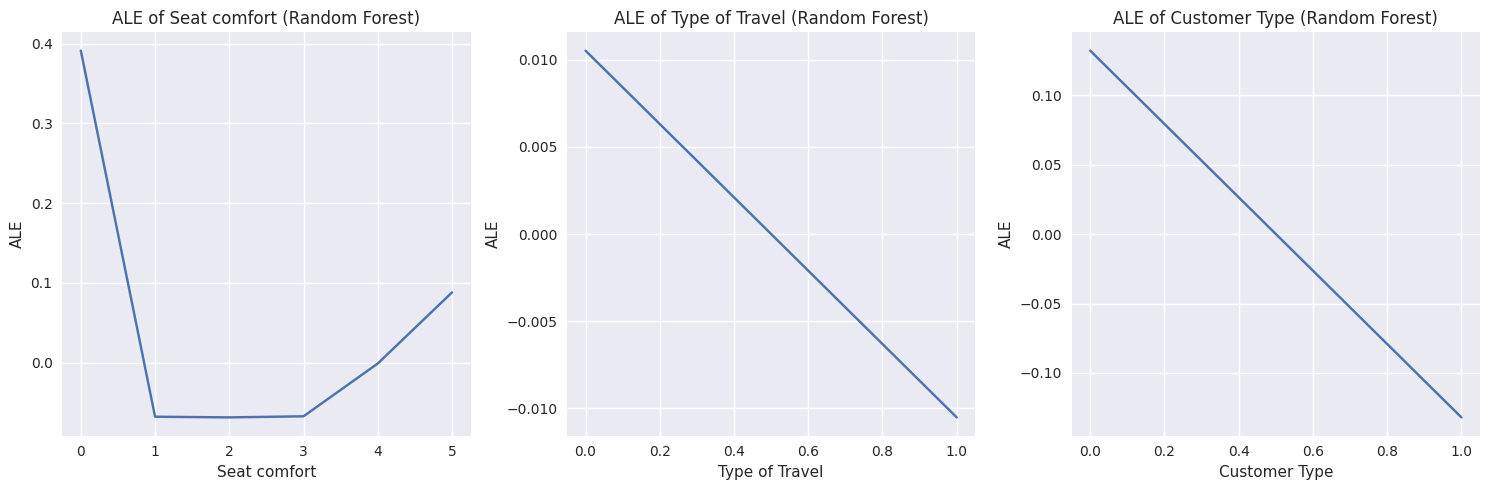

In [65]:
plot_ale(rf_model, X_train_scaled, feature_names, features_idx, model_name='Random Forest')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━

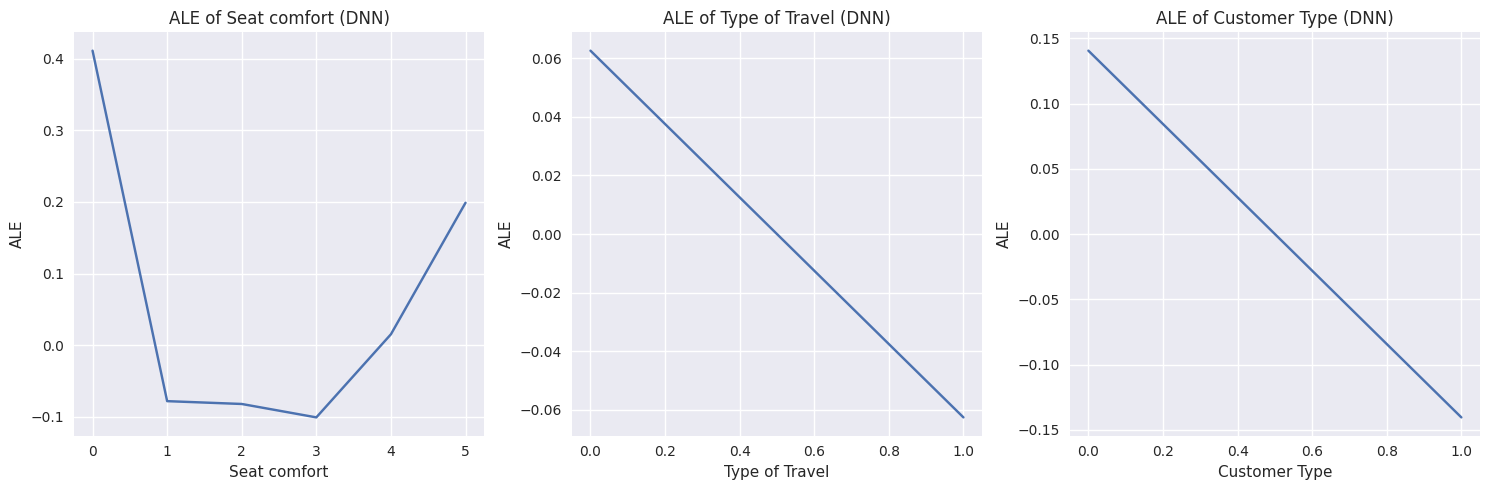

In [66]:
plot_ale(NN_model, X_train_scaled, feature_names, features_idx, model_name='DNN')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━

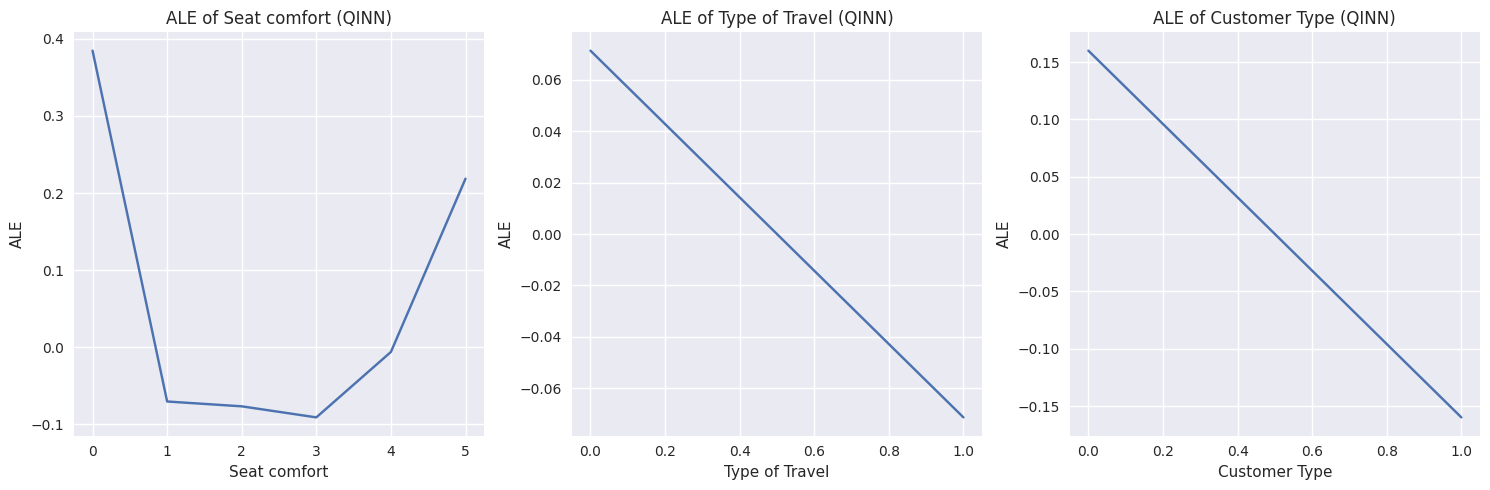

In [67]:
plot_ale(QINN_model, X_train_scaled, feature_names, features_idx, model_name='QINN')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3238/3238 ━━━━━━━━━━━

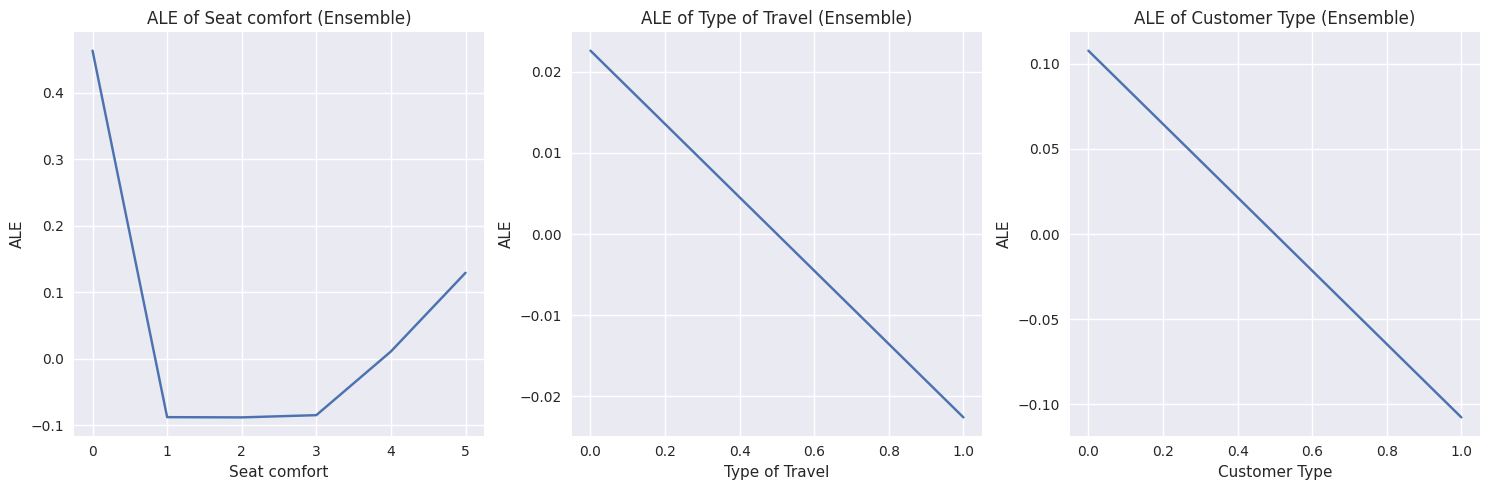

In [68]:
plot_ale(stacking_model, X_train_scaled, feature_names, features_idx, model_name='Ensemble')

## **Permutation-based Recourse Analysis**

In [80]:
feature_names=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [57]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from tqdm.notebook import tqdm 

def permutation_based_recour_analysis(model, X, y):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()
    misclassified_indices = np.where(model.predict(X) != y)[0]
    effort_scores = []
    
    for idx in tqdm(misclassified_indices, desc="Analyzing Misclassified Instances", leave=False):
        effort = 0
        prediction_changed = False
        
        for feature_idx in sorted_idx:
            original_prediction = model.predict(X[idx].reshape(1, -1))
            X_permuted = X.copy()
            X_permuted[idx, feature_idx] = np.random.permutation(X[:, feature_idx])[idx]
            new_prediction = model.predict(X_permuted[idx].reshape(1, -1))
            
            if original_prediction != new_prediction:
                prediction_changed = True
                effort += 1  
            
            if prediction_changed:
                break
        
        effort_scores.append(effort)
    
    return np.mean(effort_scores)

effort_score_rf = permutation_based_recour_analysis(rf_model, X_test_scaled, y_test)
print("Average Effort Score:", effort_score_rf)


Analyzing Misclassified Instances:   0%|          | 0/1071 [00:00<?, ?it/s]

Average Effort Score: 0.8366013071895425


Analyzing Misclassified Instances:   0%|          | 0/1071 [00:00<?, ?it/s]

Average Effort Scores: [0.02521008 0.02521008 0.06255836 0.03174603 0.03548086 0.06349206
 0.04668534 0.01774043 0.04948646 0.03921569 0.05135387 0.03081232
 0.01680672 0.03454715 0.03734827 0.02240896 0.01960784 0.01867414
 0.02614379 0.0270775  0.0821662  0.06255836]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


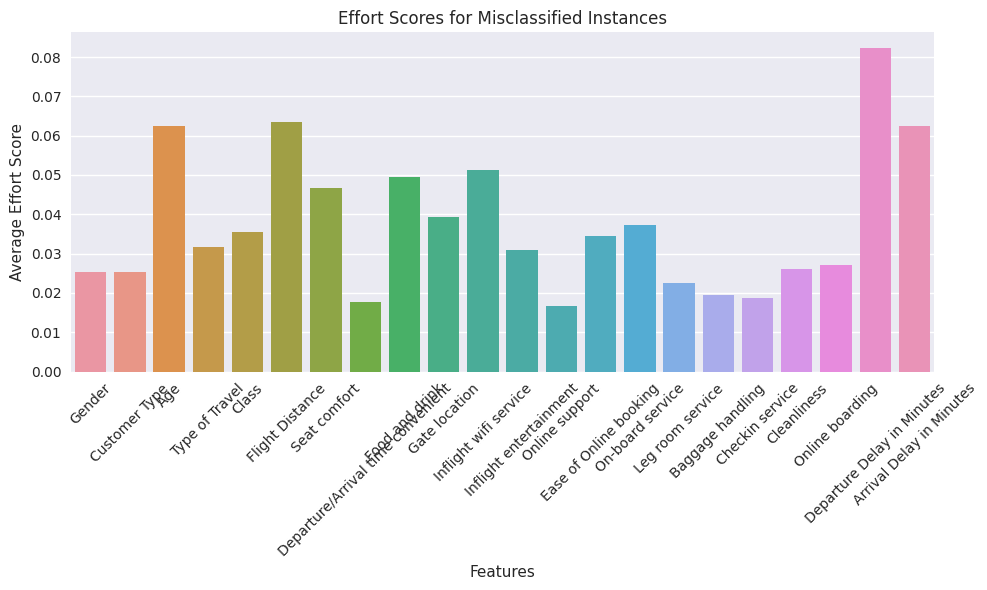

In [59]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from tqdm.notebook import tqdm  
import matplotlib.pyplot as plt
import seaborn as sns

def permutation_based_recour_analysis(model, X, y):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()
    misclassified_indices = np.where(model.predict(X) != y)[0]
    effort_scores = np.zeros(X.shape[1])

    for idx in tqdm(misclassified_indices, desc="Analyzing Misclassified Instances", leave=False):
        original_prediction = model.predict(X[idx].reshape(1, -1))
        
        for feature_idx in sorted_idx:
            X_permuted = X.copy()
            X_permuted[idx, feature_idx] = np.random.permutation(X[:, feature_idx])[idx]
            new_prediction = model.predict(X_permuted[idx].reshape(1, -1))
            
            if original_prediction != new_prediction:
                effort_scores[feature_idx] += 1  
                break  

    return effort_scores / len(misclassified_indices) if len(misclassified_indices) > 0 else effort_scores

effort_scores_rf = permutation_based_recour_analysis(rf_model, X_test_scaled, y_test)
print("Average Effort Scores:", effort_scores_rf)

def plot_effort_scores(effort_scores, feature_names):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_names, y=effort_scores)
    plt.title("Effort Scores for Misclassified Instances")
    plt.xlabel("Features")
    plt.ylabel("Average Effort Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_effort_scores(effort_scores_rf, feature_names)

Analyzing Misclassified Instances:   0%|          | 0/1031 [00:00<?, ?it/s]

Average Effort Scores: [0.0271581  0.02618817 0.04752667 0.03879728 0.05334627 0.06789525
 0.04461688 0.01939864 0.06692532 0.02036857 0.04946654 0.01939864
 0.03297769 0.07662464 0.0300679  0.05237633 0.01260912 0.01066925
 0.02521823 0.03782735 0.05237633 0.08050436]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


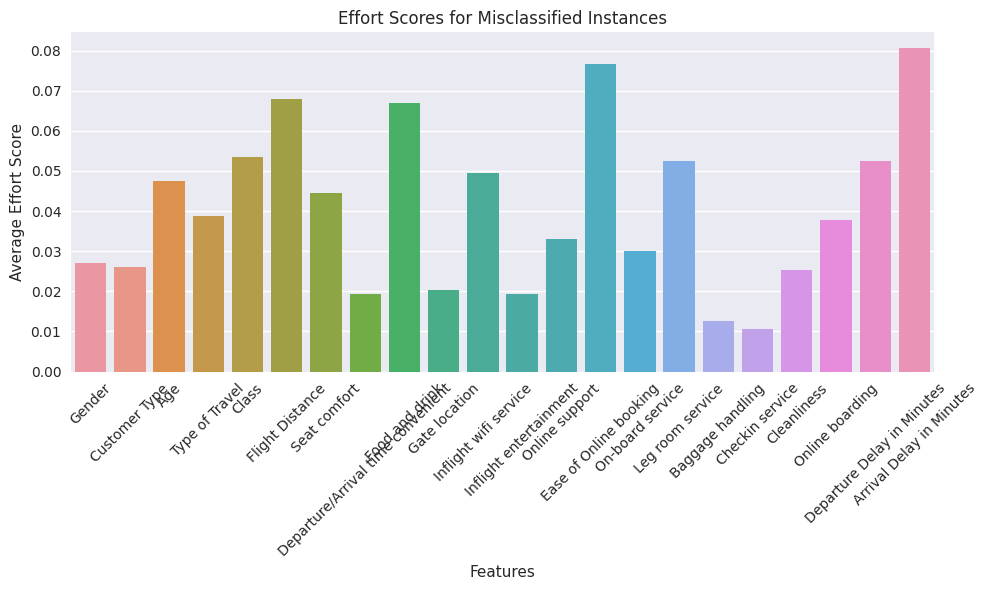

In [64]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
import seaborn as sns

def permutation_based_recour_analysis(model, X, y):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()
    
    misclassified_indices = np.where(model.predict(X) != y)[0]
    
    effort_scores = np.zeros(X.shape[1])

    for idx in tqdm(misclassified_indices, desc="Analyzing Misclassified Instances", leave=False):
        original_prediction = model.predict(X[idx].reshape(1, -1))
        
        for feature_idx in sorted_idx:
            X_permuted = X.copy()
            X_permuted[idx, feature_idx] = np.random.permutation(X[:, feature_idx])[idx]
            new_prediction = model.predict(X_permuted[idx].reshape(1, -1))
            
            if original_prediction != new_prediction:
                effort_scores[feature_idx] += 1 
                break 

    return effort_scores / len(misclassified_indices) if len(misclassified_indices) > 0 else effort_scores

# Usage Example:
effort_scores_xgb = permutation_based_recour_analysis(xgb_model, X_test_scaled, y_test)
print("Average Effort Scores:", effort_scores_xgb)

def plot_effort_scores(effort_scores, feature_names):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_names, y=effort_scores)
    plt.title("Effort Scores for Misclassified Instances")
    plt.xlabel("Features")
    plt.ylabel("Average Effort Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_effort_scores(effort_scores_xgb, feature_names)

In [36]:
import numpy as np
import tensorflow as tf

def integrated_gradients(inputs, model, baseline=None, steps=50):
    if baseline is None:
        baseline = tf.zeros_like(inputs)  
    
    inputs = tf.cast(inputs, tf.float32)
    baseline = tf.cast(baseline, tf.float32)
    
    alphas = tf.linspace(0.0, 1.0, steps)
    interpolated_inputs = [(baseline + alpha * (inputs - baseline)) for alpha in alphas]
    interpolated_inputs = tf.stack(interpolated_inputs)  

    interpolated_inputs = tf.reshape(interpolated_inputs, (steps, inputs.shape[-1]))

    with tf.GradientTape() as tape:
        tape.watch(interpolated_inputs)
        predictions = model(interpolated_inputs)
    
    grads = tape.gradient(predictions, interpolated_inputs)
    avg_grads = tf.reduce_mean(grads, axis=0) 

    integrated_grads = (inputs - baseline) * avg_grads
    return integrated_grads

baseline = tf.zeros_like(X_test_scaled[0].reshape(1, -1)) 
integrated_grads_dnn = integrated_gradients(X_test_scaled[0].reshape(1, -1), NN_model, baseline)

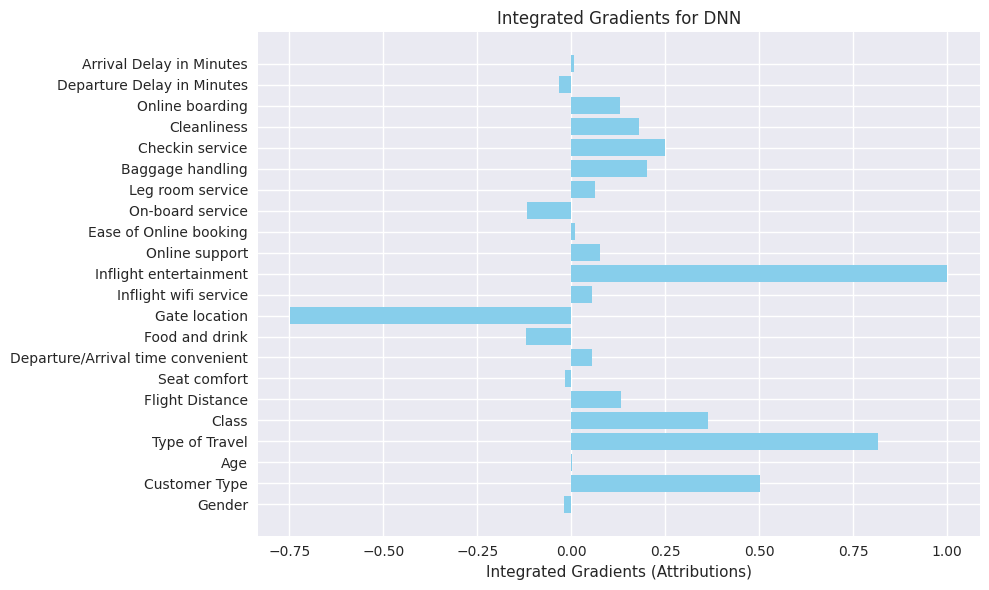

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_integrated_gradients(ig, feature_names, title="Integrated Gradients"):
    ig_normalized = ig.numpy().flatten() / np.max(np.abs(ig.numpy().flatten()))  # Normalize
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, ig_normalized, color='skyblue')
    plt.xlabel("Integrated Gradients (Attributions)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service', 
                 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
                 'On-board service', 'Leg room service', 'Baggage handling', 
                 'Checkin service', 'Cleanliness', 'Online boarding', 
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plot_integrated_gradients(integrated_grads_dnn, feature_names, title="Integrated Gradients for DNN")

In [38]:
integrated_grads_qinn = integrated_gradients(X_test_scaled[0].reshape(1, -1), QINN_model)

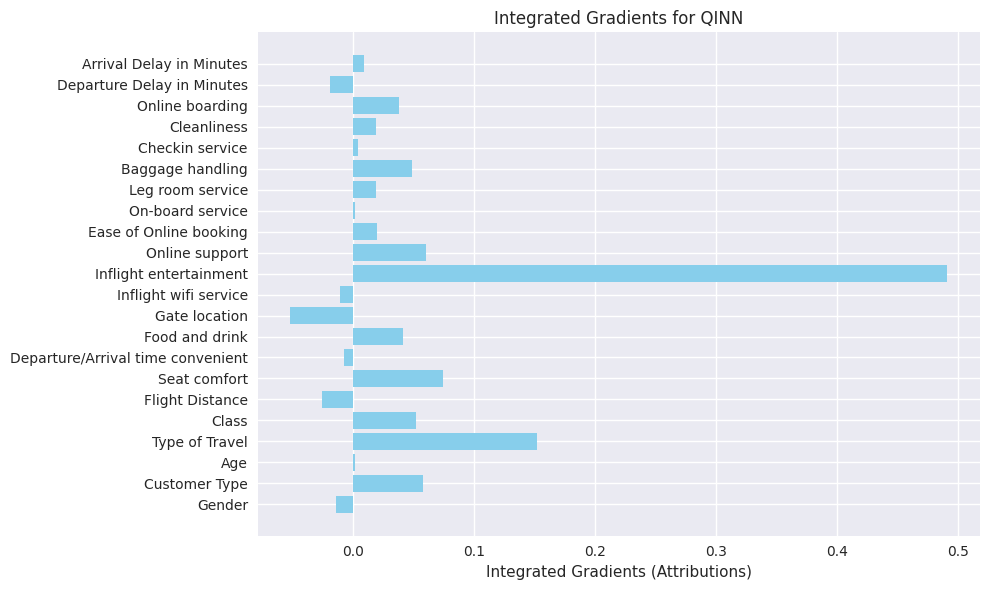

In [39]:
def plot_integrated_gradients(ig, feature_names, title="Integrated Gradients"):
    ig_values = ig.numpy().flatten()  
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, ig_values, color='skyblue')
    plt.xlabel("Integrated Gradients (Attributions)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service', 
                 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
                 'On-board service', 'Leg room service', 'Baggage handling', 
                 'Checkin service', 'Cleanliness', 'Online boarding', 
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plot_integrated_gradients(integrated_grads_qinn, feature_names, title="Integrated Gradients for QINN")